In [1]:
from ipypb import track as tqdm
import torch
import astar
import diffplan
import matplotlib.pyplot as plt
import numpy as np
import itertools
import numba
import random
%load_ext autoreload
%autoreload 2
%matplotlib inline

eps = torch.finfo().eps

# 4 rooms - BFS

CPU times: user 9.08 s, sys: 73.4 ms, total: 9.16 s
Wall time: 9.34 s
seed 808431572
19 58.978355407714844
39 57.7877197265625
59 54.794395446777344
79 52.72170639038086
99 52.46784973144531
99 Reset optimizer state
119 52.421817779541016
139 52.41806411743164
159 52.417320251464844
179 52.41700744628906
199 52.41683578491211
199 Reset optimizer state
219 52.41637420654297
239 52.416481018066406
CPU times: user 12min 51s, sys: 15.9 s, total: 13min 7s
Wall time: 13min 34s


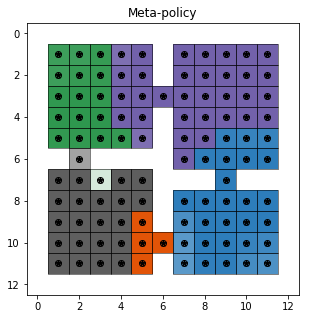

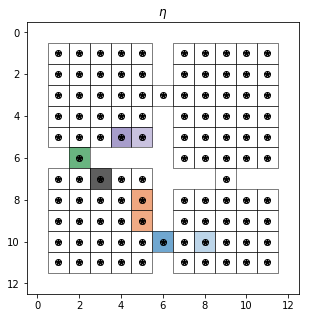

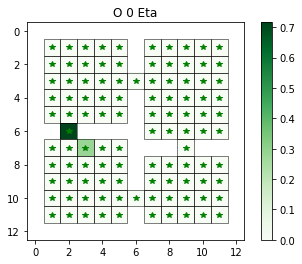

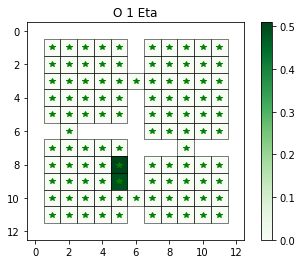

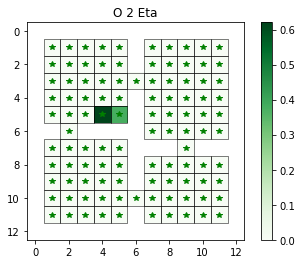

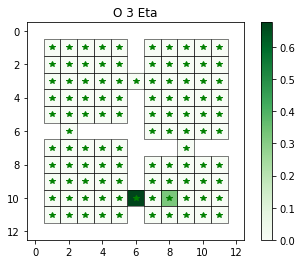

In [39]:

env = diffplan.Grid('''
xxxxxxxxxxxxx
x     x     x
x     x     x
x           x
x     x     x
x     x     x
xx xxxx     x
x     xxx xxx
x     x     x
x     x     x
x           x
x     x     x
xxxxxxxxxxxxx
''')
env.start_states = env.states
env.goal_set = set(env.states_features)
%time D = diffplan.compute_distance_matrix(env)
BFS = diffplan.compute_bfs_matrix(env, D)
%time d=diffplan.option_learner_grad(env, search_cost=D+BFS, lr=0.1, reset=100, grad_steps=250, progress=20, goal_uniform_random=True, add_goal_options=True, num_options=4)

# 4 rooms - A*

In [44]:
env = diffplan.Grid('''
xxxxxxxxxxxxx
x     x     x
x     x     x
x        S  x
x     x     x
x     x     x
xx xxxx     x
x     xxx xxx
x     x     x
x     x     x
x  G        x
x     x     x
xxxxxxxxxxxxx
''')
#env.start_states = env.states
#env.goal_set = set(env.states_features)

h = astar.compute_manhattan_heuristic(env)
%time astar_dist, astar_cost = astar.compute_astar_matrix(env, h, tqdm=tqdm, samples=20)

 [█████████████████████#######################################] 38/104 [00:59<00:02, 1.54s/it]

KeyboardInterrupt: 

In [45]:
%time d=diffplan.option_learner_grad(env, search_cost=astar_dist+astar_cost, lr=0.1, reset=100, grad_steps=250, progress=20, goal_uniform_random=True, add_goal_options=True, num_options=4)

seed 415142695
19 30.54618263244629
39 26.054664611816406
59 24.830646514892578
79 24.03261375427246
99 -37.29839324951172
99 Reset optimizer state
119 -43.411102294921875


KeyboardInterrupt: 

In [59]:
env = diffplan.Grid('''
xxxxxxxxxxxxx
x      x  G x
x S x  x    x
x   x       x
xxxxxxxxxxxxx
''')
#env.start_states = env.states
#env.goal_set = set(env.states_features)

#h = astar.compute_manhattan_heuristic(env)
#%time astar_dist, astar_cost = astar.compute_astar_matrix(env, h, tqdm=tqdm, samples=20)
#sc = astar_dist+astar_cost

#%time D = diffplan.compute_distance_matrix(env)
#BFS = diffplan.compute_bfs_matrix(env, D)
#sc = D + BFS

seed 573559715
19 28.884984970092773
39 28.2205810546875
59 27.524024963378906
79 27.05687713623047
99 26.83815574645996
99 Reset optimizer state
119 26.812917709350586
139 26.811962127685547
159 26.811792373657227
179 26.811710357666016
199 26.81167221069336
199 Reset optimizer state
219 26.811487197875977
239 26.811487197875977
CPU times: user 2.83 s, sys: 58.1 ms, total: 2.89 s
Wall time: 2.97 s


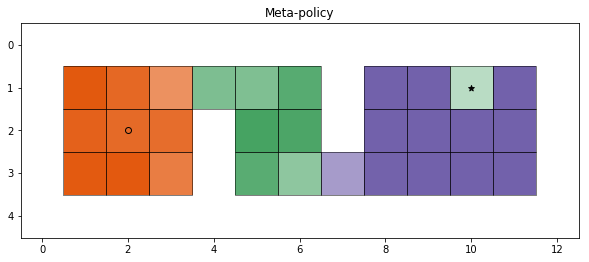

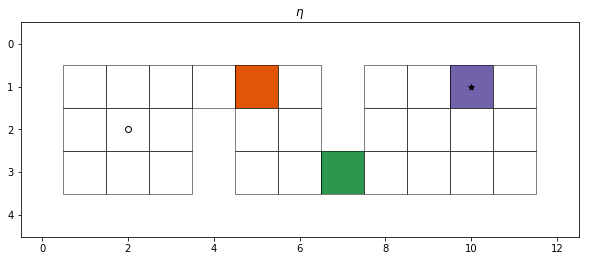

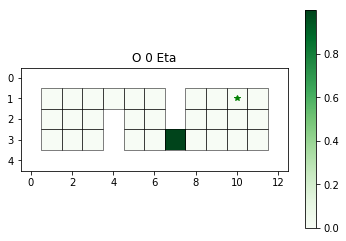

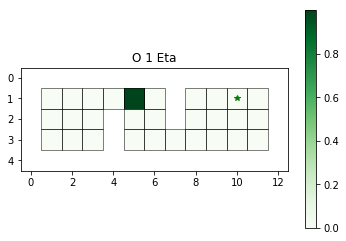

In [60]:
%time d=diffplan.option_learner_grad(env, search_cost=sc, lr=0.1, reset=100, grad_steps=250, progress=20, goal_uniform_random=True, add_goal_options=True, num_options=2)

# mark 3-room - A*

In [40]:
env = diffplan.Grid('''
xxxxxxxxx
x       x
x   xxx x
xG  x   x
xxxxx   x
x   x xxx
x   x   x
xS      x
xxxxxxxxx
''')
h = astar.compute_manhattan_heuristic(env)
astar_dist, astar_cost = astar.compute_astar_matrix(env, h, tqdm=tqdm, samples=20)

 [████████████████████████████████████████████████████████████] 37/37 [00:17<00:00, 0.47s/it]

seed 1038289416
19 50.60833740234375
39 48.38460159301758
59 46.45713424682617
79 45.296722412109375
99 44.423866271972656
99 Reset optimizer state
119 43.414119720458984
139 43.24078369140625
159 43.23030090332031
179 43.227806091308594
199 43.226497650146484
199 Reset optimizer state
219 43.221553802490234
239 43.221351623535156
259 43.221309661865234
279 43.22129440307617
299 43.2213020324707
299 Reset optimizer state
319 43.22125244140625
339 43.22124481201172
CPU times: user 5.53 s, sys: 85.8 ms, total: 5.62 s
Wall time: 5.64 s


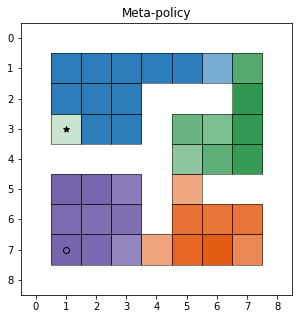

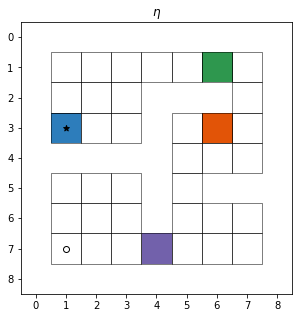

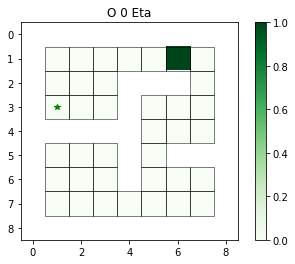

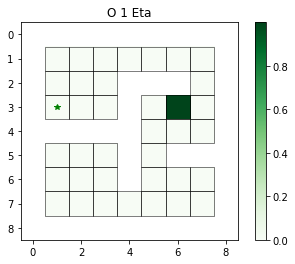

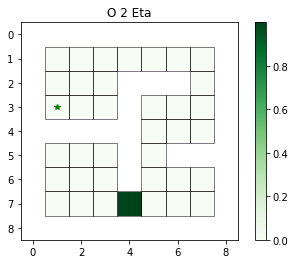

In [38]:
%time d=diffplan.option_learner_grad(env, search_cost=astar_dist+astar_cost, lr=0.1, reset=100, grad_steps=350, progress=20, goal_uniform_random=True, num_options=3, add_goal_options=True)
